# <div align="center">Theory</div>

# Aim: Solve the one dimensional time independent Schrodinger equation of  an one dimensional linear harmonic oscillator, using Numerov's algorithm

The one dimensionless Schrodinger equation is:

$$
\left[-\frac{\hbar^2}{2 m}\frac{d^2}{dx^2} + V\left(x\right)\right]\Psi\left(x\right) = E \Psi\left(x\right)
$$

where, $m$ is the mass of the particle, $E$ is the energy of the particle, $\Psi(x)$ is the wavefunction of the particle, and $V(x)$ is the Hamonic oscillator potential, given by

$$
V(x) = \frac{1}{2} m\omega^2 x^2 = \frac{1}{2} k x^2 \quad \left( \omega =\sqrt{\frac{k}{m}}\right)
$$

where, $k$ is the some **spring constant**.

## Note: For an anharmonic or nonlinear harmonic oscillator, the potential is given as:

$$
V(x) = \frac{1}{2} k x^2 +  \frac{1}{2} b x^3\quad \text{where, $b$ is some nonlinearity parameter; it is zero for the one dimensional linear harmonic oscillator.}
$$


Putting, $V(x) = \frac{1}{2} m\omega^2 x^2$ and then multiplying both LHS and RHS of the one dimensional Schrodinger equation for the linear harmonic oscillator, by $\frac{-2m}{\hbar^2}$, we get:

$$
\frac{d^2 \Psi\left(x\right)}{dx^2} + \left[\frac{2mE}{\hbar^2}- \frac{m^2 \omega^2}{\hbar^2} x^2\right]\Psi\left(x\right) = 0
$$

## Next goal is to make the above equation dimensionless

substitute, $x = \alpha X$ and multiply both LHS and RHS of the above equation by $\alpha^2$. This gives:

$$
\implies \frac{d^2 \Psi\left(X\right)}{dX^2} + \left[\frac{2m\alpha^2 E}{\hbar^2}- \frac{m^2 \omega^2\alpha^4}{\hbar^2} X^2\right]\Psi\left(X\right) = 0
$$

Here, $\alpha$ has dimension of $[L]$ and $X$ is dimensionless. The above equation is now dimensionless. Write, 

$$
\frac{m \omega\alpha^2}{\hbar} X = \zeta\quad \text{and}\quad \frac{2m\alpha^2 E}{\hbar^2} = \epsilon
$$

**How should we define $\alpha$ to make our equation simple?**

We know that the energy eigen values of a one dimensional linear harmonic oscillator are given by:

$$ 
E_n = \hbar \omega(n + \frac{1}{2}) = \left(2n+1\right)\frac{\hbar\omega}{2}\quad\left(n = 0, 1, 2, \cdots\right)
$$

Therefore, lets choose $\alpha$ such that, the dimensionless energy, $\epsilon$ becomes

$$
\begin{align}
&\epsilon_n = \left(2n+1\right)\quad \left(\text{postive odd integers}\right)\\
\implies & \frac{2m\alpha^2 E}{\hbar^2}  = \left(2n+1\right)\\
\implies & \frac{2m\alpha^2 \left(2n+1\right)\frac{\hbar\omega}{2}}{\hbar^2}  = \left(2n+1\right)\\
\implies & \frac{m\alpha^2 \omega}{\hbar}  = 1\\
\implies & \alpha  = \sqrt{\frac{\hbar}{m\omega}} = \sqrt{\frac{\hbar\omega}{m\omega^2}} = \sqrt{\frac{\hbar\omega}{k}}  
\end{align}
$$

**Dimension of $\alpha$**:
$$
\alpha  = \sqrt{\frac{\hbar}{m\omega}} = \sqrt{\frac{ J s}{m s^{-1}}}= \sqrt{\left[\frac{M L T^{-2} L T}{M T^{-1}}\right]} = \sqrt{\left[L^2\right]} = \left[L\right]
$$

which is what we expect it to be !

Substituting $\alpha$ in $\zeta$ we get:

$$
\zeta = \frac{m \omega\alpha^2}{\hbar} X = \frac{m \omega\frac{\hbar}{m\omega}}{\hbar} X = X
$$


Therefore, the final dimensionless Schrodinger equation for a one dimensional linear harmonic oscillator is given as:
$$
\frac{d^2 \Psi\left(X\right)}{dX^2} + \left[\epsilon- X^2\right]\Psi\left(X\right) = 0\\
$$

The above equation is dimensionless and will be used for solving numerically.


## Boundary conditions:

The boundary condition for the wavefunctions of a harmonic oscillator is:

$$
\Psi(\pm \infty) = 0
$$

## Update equation:

The **update equation** for the above Schrodinger equation according to **Numerov's method** is given by (refer to the notes):

1. **Forward integration**: By forward integration I mean, integration from $-\infty$ to $\infty$

$$
\Psi_{i+1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i-1}f_{i-1}}{f_{i+1}}
$$

Or,

$$
\Psi_{i+2} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i}f_{i}}{f_{i+2}} \quad\left(\text{Putting, $i = i+1$}\right)
$$

where,

$$
f_i = 1 + \frac{h^2}{12}g_i, \quad g_i = \epsilon - X_i^2
$$

**Note**: Here, $h$ is the **step size** along x-axis and not the **Plank's constant**.

**Notice !**, we need $\Psi_{i+1}$ and $\Psi_{i}$ in order to evaluate, $\Psi_{i+2}$. Therefore, for the first iteration, i.e., $i = 0$, we will need to supply, $\Psi_{1}$ and $\Psi_{0}$ to evaluate, $\Psi_{2}$. The value of  $\Psi_{0}$ is nothing but the value of $\Psi(-\infty)$ which is zero according to the boundary condition. The value of $\Psi_{1}$ can be choosen arbitarily, we choose some small value say, $\Psi_1 = d\Psi = 0.01$.

2. **backward integration**: Backward integration simply mean integrating from $\infty$ to $-\infty$. For this we rewrite the update equation as:

$$
\begin{align}
&\Psi_{i-1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i+1}f_{i+1}}{f_{i-1}}\\
%
\implies &\Psi_{i} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i+2}f_{i+2}}{f_{i}}\quad\left(\text{Putting, $i = i+1$}\right)\\
\end{align}
$$

## Note:
**For Harmonic oscillator problem, the backward and forward integration both gives correct result.**


## Normalization condition:

Let the normalization factor be $N$ such that, $N\Psi(r)$ is normalized, i.e.,
$$
\begin{align}
&\int_{-\infty}^\infty N^2|\Psi(X)|^2 dX = 1\\
\implies & N = \sqrt{\frac{1}{\int_{-\infty}^\infty|\Psi(X)|^2 dX}}
\end{align}
$$

## Shooting algorithm

**Shooting algorithm:** The algorithm to find the energy eigen values is sometimes known as the shooting algorithm.

To find the Energy **Eigen values** we will utilize the boundary conditions:
$$
\begin{equation}
\Psi(\pm\infty) = 0
\end{equation}
$$

This boundary condition can be implemented by choosing, some large, $x = x_c$ (say) such that, $\Psi(x_c) = 0$. 

Lets say, $E_1$ corresponds to a correct energy level, then when we **backward/forward integrate** the one dimensional schrodinger equation derived earlier using **Numerov’s method**, we should get $\Psi(\pm\infty) = 0$. A deviation of the energy from $E_1$ will result in $\Psi(\pm \infty) \ne 0$. The basic procedure to search for correct Energy Eigen value aka **shooting algorithm** is as follows:

Start wite a guess energy, 
1) The guess energy, $E_1$ should be smaller than the actual energy. For example, if we are searching for the energy eigen value of the ground state which is $\epsilon = 1$. Then our guess energy should be smaller than 1.<br>
2) With the guess energy forward integrate the equation and get the value of the wavefunction at $x = \infty$, which we will denote as $\Psi_1$. Meanwhile, Set another energy, $E_2 = E_1$.<br>
3) Increase the energy $E_2$ by an amount $\delta E$ and get a new energy, $E_2 = E_2 + \delta E$. <br>
4) Integrate the Scrodinger equation to get the corresponding wavefunction, $\Psi_2$ and evaluate $\Psi_2(\infty)$. <br>
5) Go back to step 2 untill we get $\Psi_1(\infty)\times \Psi_2(\infty) <0$. <br>
6) At this step, we should have the correct energy enclosed in the interval, $[E_1, E_2]$. Use root finding method, e.g. **scipy.optimize.brentq** to get the correct energy.

# <div align="center">Code</div>

# Common libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Uncommon libraries used

## 1) *scipy.integrate.simps()*: 

**Syntax** : scipy.integrate.simps(y, x)<br>
**Return** : Returns the integrated value of y(x) using **Simpsion's** rule method.<br>

Example: 

x = **numpy**.arange(0, 10)<br>
y = **numpy**.sqrt(x)<br>
integration = **scipy.integrate.simps**(y, x)

## 2) *scipy.optimize.brentq*
Uses the classic **Brent’s method** to find a root of the function $f(x)$ on the sign changing interval $x\in[a , b]$. Check [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) for the syntax. For details on Brent's method check [this](https://nickcdryan.com/2017/09/13/root-finding-algorithms-in-python-line-search-bisection-secant-newton-raphson-boydens-inverse-quadratic-interpolation-brents/). Recall that we had algorithms such as *Line Search*, *Bisection*, *Secant*, *Newton-Raphson*, *Inverse Quadratic Interpolation*; *Brent’s Method* is just one of such methods for finding the root of a function in the sign changing interval $x\in[a,b]$. By "**root** of a function", $f(x)$ I mean the value of $x$ where $f(x) = 0$.

In [68]:
from scipy.integrate import simps
from scipy.optimize import brentq

# <div align="center">Function definitions</div>

We define three functions:

## 1) eigen_function_at_infinity(epsilon, x): 

it takes dimensionless energy epsilon and a vector x and returns the value of the eigen function corresponding to dimensionless energy, epsilon at x = infinity

## 2) eigen_function(epsilon, x):

it takes dimensionless energy epsilon and a vector x and returns a vector containing the value of the  corresponding wavefunction at all x.

## 3) eigen_values(E_guess, n):

It takes a guess dimensionless eigen energy, E_guess and returns a vector containing the first $n$ eigen values.

In [69]:
###############################################################
#                  eigen_function_at_infinity
###############################################################

def eigen_function_at_infinity(epsilon, x):
    
    # parameters
    global h, b
    
    y = np.zeros(x.size)
    y[0] = 0.0                 # wavefunction at -infinity = 0
    dy   = 0.01
    y[1] = dy

    h12 = h**2 / 12.
    g  = epsilon - x**2 - b*x**3
    f  = 1.0 + h12 * g

    for i in range(0, g.size - 2, 1):
        y[i+2] = (12 - 10*f[i+1])* y[i+1] - y[i] * f[i]
        y[i+2] /= f[i+2]

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))     # a/=3 means a = a/3 


    y_infinity = y[x.size -1]

    
    return y_infinity


###############################################################
#                  eigen_function
###############################################################

def eigen_function(epsilon, x):
    
    # parameters
    global h, b           # step size
    
    y = np.zeros(x.size)
    y[0] = 0.0            # wavefunction at -infinity  = 0
    dy   = 0.01
    y[1] = dy

    h12 = h**2 / 12.
    g  = epsilon - x**2 - b*x**3
    f  = 1.0 + h12 * g

    for i in range(0, g.size - 2, 1):
        y[i+2] = (12 - 10*f[i+1])* y[i+1] - y[i] * f[i]
        y[i+2] /= f[i+2]

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))

    return y


###############################################################
#                  eigen_function
###############################################################

def eigen_values(E_guess, x,  n):

    Epsilon = np.zeros(n)
    
    E_2 = E_1 = E_guess
    
    # step size for energy
    dE      = 0.1 

    for i in range(n):
        # wavefunction at x = infinity corresponding to the guess energy
        y1      = eigen_function_at_infinity(E_1, x)
        
        while True:
            E_2 += dE
            y2 = eigen_function_at_infinity(E_2, x)
            
            if y1 * y2 < 0:
                break
        Epsilon[i] = brentq(eigen_function_at_infinity, E_1, E_2, args=(x))
        E_1 = E_2 = Epsilon[i]+ dE
    
    return Epsilon

# <div align="center">Main code starts from here</div>

# Print the values of first six eigen values

In [70]:
x = np.linspace(-5, 5, 1000)
h = x[1] - x[0]           # step size
b = 0

Epsilon = eigen_values(0, x, 6)

for i in range(6):
    print ('Energy for n = %d is E = %5.3f' % (i, Epsilon[i]))

Energy for n = 0 is E = 1.000
Energy for n = 1 is E = 3.000
Energy for n = 2 is E = 5.000
Energy for n = 3 is E = 7.000
Energy for n = 4 is E = 9.000
Energy for n = 5 is E = 11.000


# Evaluate the eigen functions for the first six eigen values

In [71]:
# store the wavefunction for first six eigen values
y = [eigen_function(Epsilon[i], x) for i in range(Epsilon.size)]

# Plot the first six wavefunctions

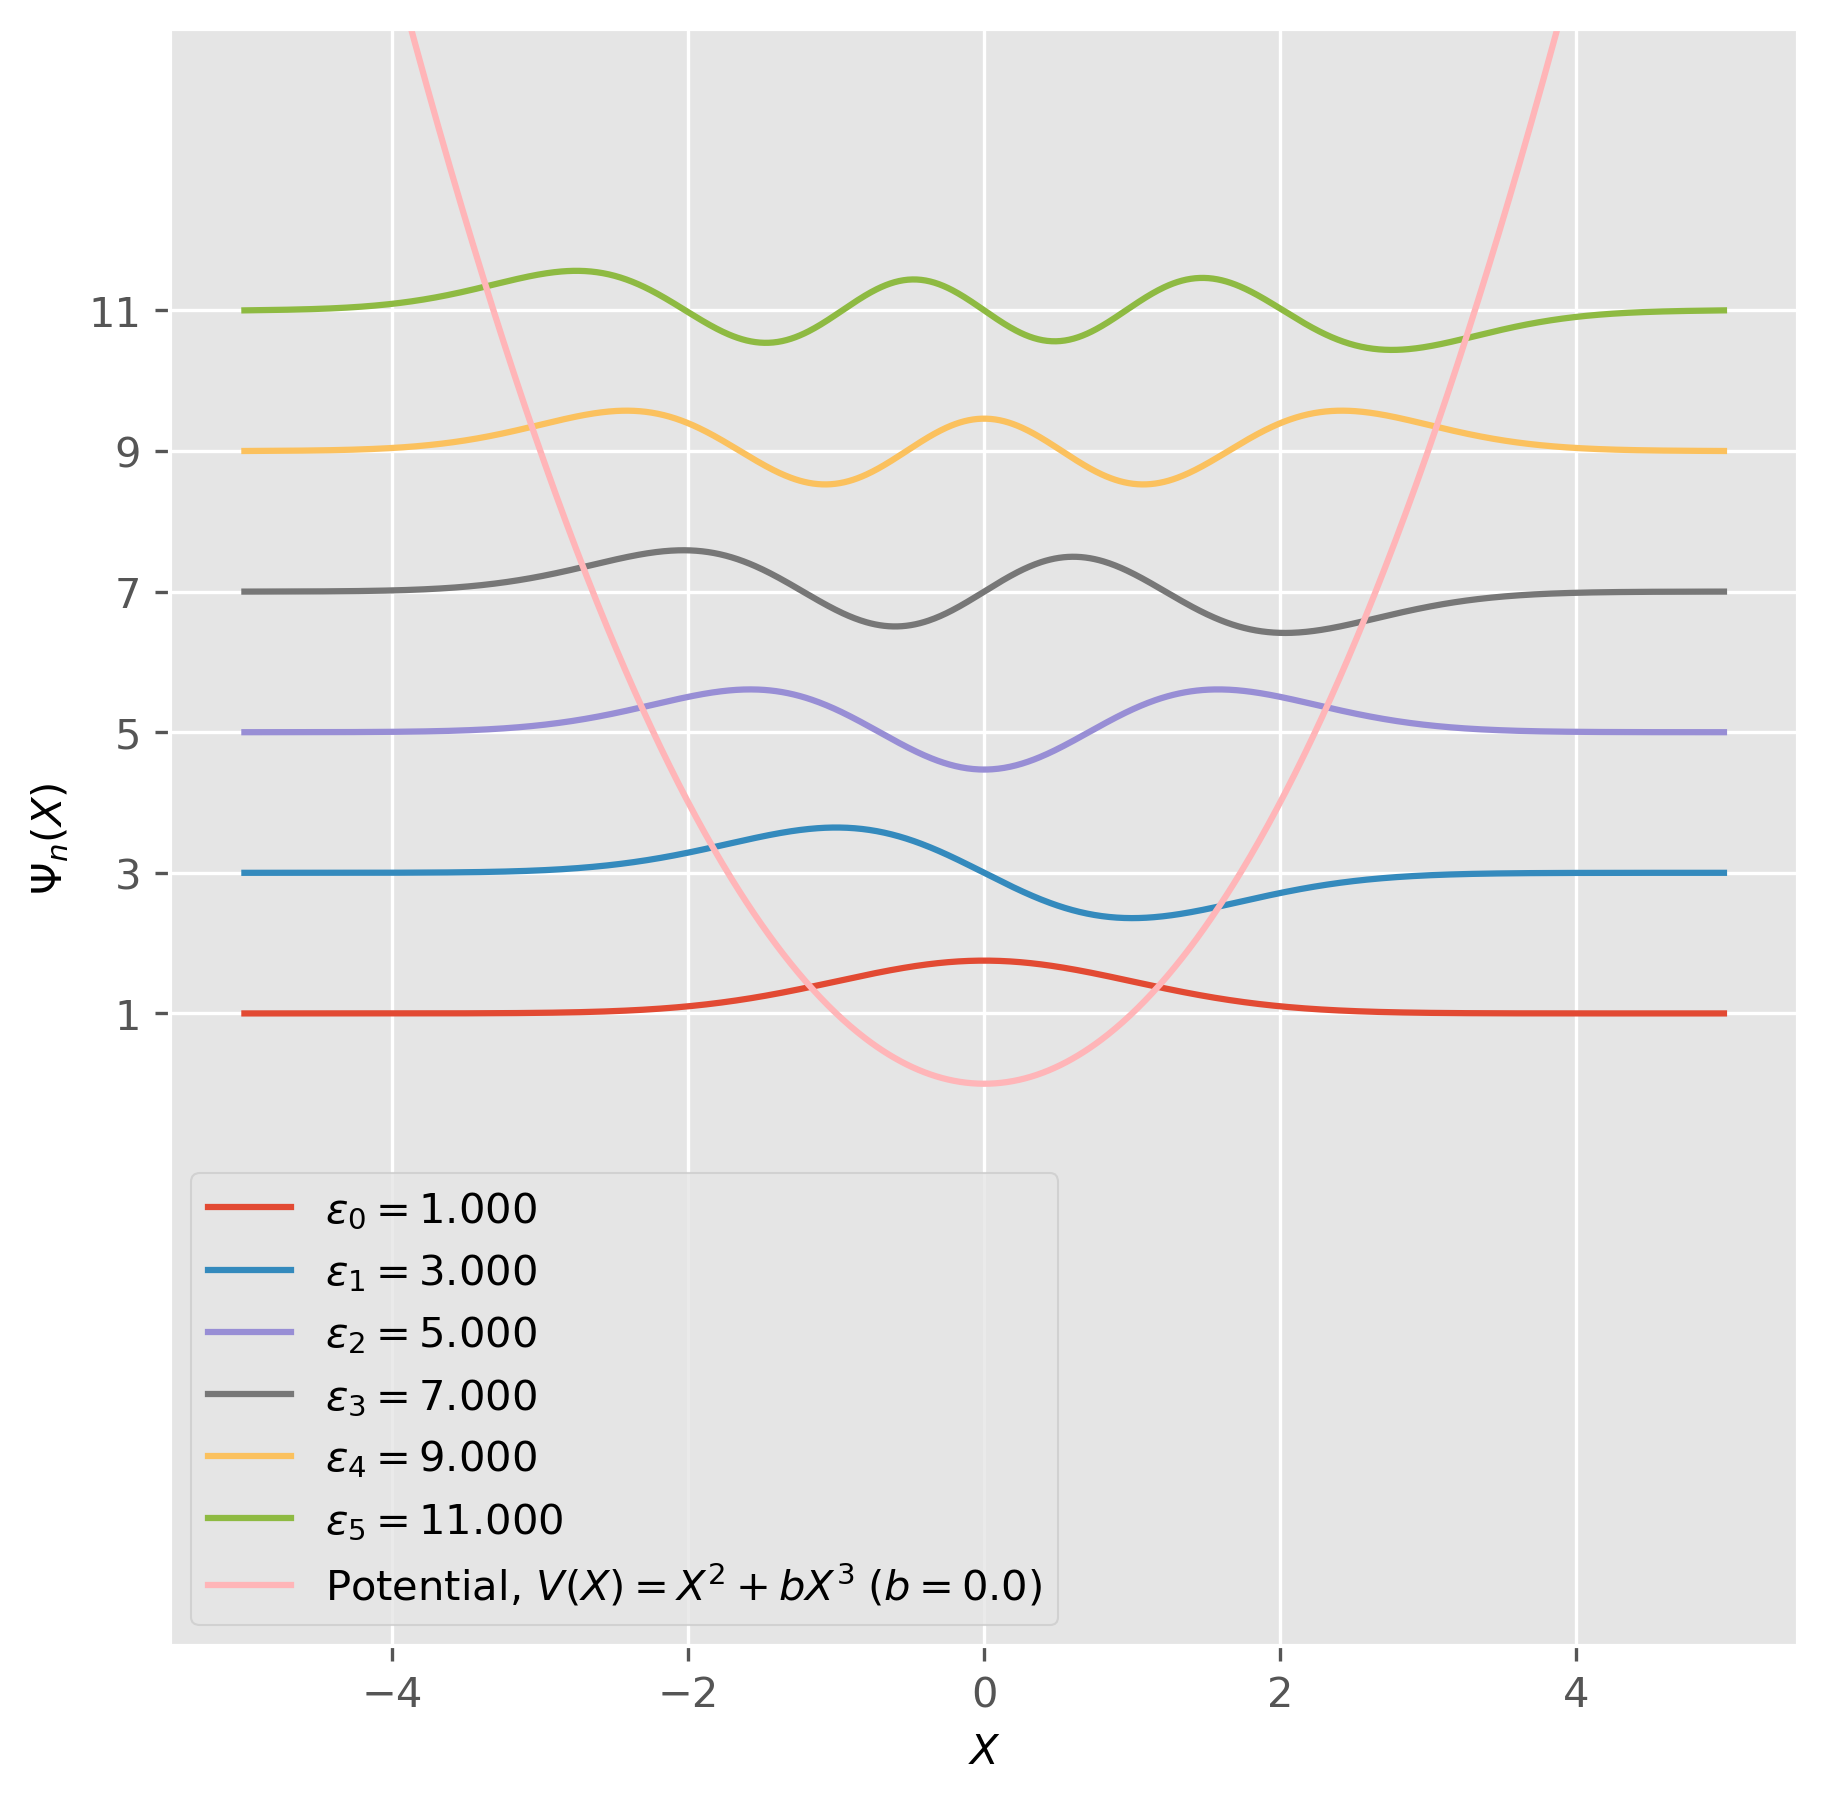

In [72]:
# plot style
plt.style.use('ggplot')

# figure size
plt.figure(figsize=(7,7), dpi = 300)

# plot the first six wavefunctions
for i in range(Epsilon.size):
    plt. plot(x,y[i] + Epsilon[i], label=r'$\epsilon_%d = %5.3f $' % (i, Epsilon[i]))

# plot the linear harmonic oscillator potential
plt. plot(x,x**2 + b*x**3, label=r'Potential, $V(X) = X^2 + bX^3\; (b = %2.1f )$' % b)    

# y axis ticks
plt.yticks(np.arange(min(Epsilon), max(Epsilon)+1, Epsilon[2]- Epsilon[1]))

# y axis range
plt.ylim([-8, 15])

# legends
plt.legend(loc ='best')
#plt.legend([r'$\epsilon_0 = 1 $', r'$\epsilon_1 = 3$', r'$\epsilon_2 = 5$', r'$\epsilon_3 = 7$', r'$\epsilon_4 = 9$', r'$\epsilon_5 = 11$'], loc ="upper right" )

# axis labels
plt.ylabel(r'$\Psi_n(X)$')
plt.xlabel(r'$X$')

# save the plot to file named 'plot.png'
plt.savefig('wavefunctions.png')

# Display the plot in this notebook
plt.show()

# Exercise: Solve the one dimensional Schrodinger equation for an anharmonic oscillator or nonlinear harmonic oscillator

A nonlinear of anharmonic oscillator has a cubic term in the potential i.e.,

$$
V(x) = \frac{1}{2} k x^2 + \frac{1}{2} b x^3
$$

## Solution:

To do this simply go to [this cell](#Print-the-values-of-first-six-eigen-values) and change $b$ to some nonzero value and run the code again. Play around with different values of $-1<b\le1$ and see how the wavefunction and energy eigen values change. 